<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# NLP
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Metriques
</div>

* Bag Of Words
* TF-IDF (Term-Frequency - Inverse Document Frequency) :
  * poids=fréquence du terme × indicateur similarité
  * poids=frequence du n-gram × idf(n-gramme)

* bigrams / n-grammes => bigrammes pour les couples de mots, trigrammes pour les groupes de 3, etc. Séparer en mot unique est en fait un cas particulier appelé unigrammes.

Extraction de features :
* NER (Named Entity Recognition) : reconnaître des personnes, endroits, entreprises, etc.
* Extraction de relations : essayer d'extraire des relations sémantiques entre différents termes du texte. Par exemple, des relations familiales ("Marie est l'enfant de Patrick") spatiales ("Le piano est devant la fenêtre"), etc. Ces informations peuvent ensuite être stockées dans une base de données relationnelles ou un graphe.
* Extraction d'événements : extraire des actions qui arrivent à nos entités. Par exemple "le cours de l'action X a augmenté de 5%" ou bien "le président à déclaré X dans son discours"
* POS Tagging (Part-of-Speech Tagging) : représente les méthodes qui récupèrent la nature grammatical des mots d’une phrase - nom, verbe, adjectif, etc. Ce sont des propriété qui peuvent servir de caractéristiques utile lors de la création de certains modèles



<mark>Choose Between Count and TF-IDF</mark>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Calculate TF-IDF    
</div>

https://openclassrooms.com/fr/courses/6532301-introduction-to-natural-language-processing/7067116-apply-the-tf-idf-vectorization-approach

> In short, tf-idf vectorization gives a numerical representation of words entirely dependent on the nature and number of documents being considered. The same words will have different vector representations in another corpus.


In scikit-learn, tf-Idf is implemented as the `TfidfVectorizer`.

 <div style="display: flex; background-color: Green; padding: 7px;" >
 
 ### Choose Between Count and TF-IDF
 </div>

Choosing the  CountVectorizer over the TfidfVectorizer depends on the nature of the documents you are working on. Tf-idf does not always bring better results than merely counting the occurrences of the words in each document!     

Here are a couple of cases where tf could perform better than tf-idf :    

* If words are <mark>distributed equally across the documents</mark>, then normalizing by idf will not matter much. You'll see this in the example on the Brown corpus. The documents use roughly the same vocabulary in all texts. As such, taking into account each word's specificity across the corpus does not improve the model's performance.

* If <mark>rare words do not carry valuable meaning</mark> to the classification model, then td-idf does not have a particular advantage. For example, when someone uses slang, that means something general in a comment on social media. 

 <div style="display: flex; background-color: Green; padding: 7px;" >
 
 ### Term-Term Matrix - word-word co-occurrence matrix
 </div>

Look at frequencies among neighboring words to capture the co-occurrence matrix's contextual information.

For context, use a window around the word (i.e., three words to the left and three to the right), in which case the cell represents the number of times the word occurs in a (±3) surrounding window.    

The idea is to loop over each text in the corpus, build the surrounding window of words.

```Python
from sklearn.feature_extraction.text import CountVectorizer
docs = ['this this this book',
        'this cat good',
        'cat good shit']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
# X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence (see below)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format
```

```
         .  bus  by  day  every  go  i  night  school  theatre  to
.        0    1   1    0      0   0  0      0       0        0   0
bus      1    0   2    1      0   0  0      1       0        0   0
by       1    2   0    1      2   0  0      1       0        0   0
day      0    1   1    0      1   0  0      0       1        0   0
every    0    0   2    1      0   0  0      1       1        1   2
go       0    0   0    0      0   0  2      0       1        1   2
i        0    0   0    0      0   2  0      0       0        0   2
night    0    1   1    0      1   0  0      0       0        1   0
school   0    0   0    1      1   1  0      0       0        0   1
theatre  0    0   0    0      1   1  0      1       0        0   1
to       0    0   0    0      2   2  2      0       1        1   0
```

<div style="display: flex; background-color: Green; padding: 7px;" >
 
 ### Recap
 </div>

    A tf-idf score is a decimal number that measures the importance of a word in any document.

    In scikit-learn, tf-idf is implemented as the TfidfVectorizer. There are several ways to compute the score for each term and document. 

    By concatenating the scores for each corpus document, you get a vector, and the dimension of the word vector equals the number of documents in the corpus.

    A limitation to tf-idf is that it gives a numerical representation of words entirely dependent on the nature and number of documents considered. The same words will have different vectors in another context.

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Sentiment Analysis
</div>

AWS Comprehend, Microsoft Text Analysis, and Google NLP


<div style="display: flex; background-color: Green; padding: 7px;" >

### Google sample
</div>

```python
import requests
import json

key = { "key": "<Your API KEY here>"}
data = { 
    "document": {  
        "type":"PLAIN_TEXT", 
        "content":"Alice was very frightened." 
    }, 
    "encodingType":"UTF8" 
}
results = requests.post(url, params=key, json=data)

content = results.content.decode('utf-8')
json.loads(content)['documentSentiment']
```

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Word Embeddings
</div>


Attention, les modèles n'ont pas été entrainés sur les mêmes données, il faut donc choisir le modèle en fonction de l'objectif et des données à traiter.

- glove-twitter-50 is a size 50 GloVe model trained on a Twitter dataset.
- glove-wiki-gigaword-100 is a size 100 GloVe model trained on Wikipedia 2014 + Gigaword 5.
- word2vec-google-news-300 is a size 300 word2vec model trained on Google News (~ 100 billion words).

Modules :
- Genism and spaCy are two major Python libraries that work with pre-trained word embeddings

* Gensim was previously better known for topic modeling


The word2vec vocabulary is not only composed of regular words. It also contains:

* Bigrams and trigrams:  common_equityholders , prawn_dish, Vancouver_Canucks_goaltender
* Proper nouns: Scott_RUFFRAGE or Ty_Ballou
* Specific character sequences: &A

> Also, note that there is a distinction between uppercase and lowercase words. You can verify that dog and Dog do not have the same vector.
For example, checking the most similar words, apple and Apple shows that according to word2vec:

- apple is a fruit (similar words: apples, pear, fruit , etc.)

- Apple is the company (similar words: Apple_AAPL, Apple_Nasdaq_AAPL, Apple_NASDAQ_AAPL, etc.). 

<div style="display: flex; background-color: Green; padding: 7px;" >

### Cultural bias and out-of-vocabulary (OOV) issues
</div>


**Cultural Bias**

The word2vec model was trained on a massive U.S. Google News corpus. It learned the relationships between words on the news as seen by Google in the U.S. There's nothing inherently biased about news in the U.S. versus some other corpus from another part of the world, but training on such a dataset means that the model inherits a certain dose of cultural bias.

One funny example happens to be with my own surname, Alexis. In the U.S., Alexis is a feminine name, whereas, in the rest of the world (as far as I know), it's a masculine name. You can see the U.S. bias by looking at words most similar to Alexis, according to word2vec:

```python
model.most_similar('Alexis')
> ('Nicole', 0.7480324506759644),
 ('Erica', 0.745315432548523),
 ('Marissa', 0.7406104207038879),
 ('Alicia', 0.7322115898132324),
 ('Jessica', 0.7315416932106018),
 ....
 ```

**Out-of-Vocabulary Words (OOV)**

Another issue with GloVe and word2vec is the finite nature of the model's vocabulary.
You have seen that the word2vec list of known tokens is heterogeneous and complex. But even with over 3 million entries, there are certain words it can't identify. In other words, words for which there is no associated vector. For example:

* Covid (in all its cases and with or without "-19")
* Word2vec (yes, word2vec does not know about its own existence).

You can find all the words in the word2vec vocabulary starting with a certain string using the following code:

```python
# find all the words starting with 'covid'
start_with = 'covid'
vocab = [tk.lower() for tk in  wv.vocab.keys() if tk.lower()[:len(start_with)] == start_with]
vocab.sort()
vocab
```

it returns 88 tokens, none of which being versions of COVID. This is normal since this word2vec model was trained in 2013/2014, way before the COVID era.     

There are different strategies to handle out-of-vocabulary words. The most simple one is to return a vector of zeros for unknown words.
```python
try:
    return model[word]
except:
    return numpy.zeros(N)
```

Another possibility is to use the pre-trained Word2vec model and your own dataset to continue training the model. Out-of-vocabulary words that are present in your dataset will end up with their own vector representations. The process is called fine-tuning or transfer learning and is particularly helpful when working on domain-specific corpuses (healthcare, biomedical, law, or astronomy).

<div style="display: flex; background-color: Green; padding: 7px;" >

### Comparison
</div>

* <mark>Word2vec</mark> is obtained by using a neural network to predict missing words in sentences, and taking the coefficient of the last layer of the neural network as the elements of the word vector
* <mark>GloVe</mark> focuses on capturing the similarity in context between words. It is lighter and more efficient than word2vec.
* <mark>FastText</mark> works with sub-word tokenization and, as a consequence, can handle out-of- vocabulary words.


**Word2vec** offers two different scenarios for training the neural network:

    CBOW or continuous bag-of-words predicts the word given a certain context (like in the example above). It works well for common words but less so for rare ones.

    Skip-Gram: predicts context given the word. It works well with a small amount of training data and properly represents rare words or phrases.

**GloVe**

In practice, GloVe uses a highly-optimized algorithm (SGD) during training, which converges even on a small corpus. The consequence is that, compared to Word2vec, GloVe offers:
- Faster training.
- Better RAM/CPU efficiency (can handle larger documents).
- More efficient use of data (helps with smaller corpora).
- More accurate for the same amount of training.

**FastText**

To solve the issue of OOV, fastText uses a tokenization strategy based on character n-grams and whole words. A character n-gram is simply a sequence of n letters.
> When fastText encounters an unknown word in its vocabulary, it will deconstruct the word into its n-grams and aggregate the associated vectors to calculate a word vector. It solves the problem of OOV words, previously unseen words, or misspellings.

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Pre-processing step 
</div>

* Désaccentuation
* Passer en minuscules
* Suppression des stopwords
* Stemmer
* Lemmatiser

In [7]:
import nltk as nlk
import marisa_trie
from IPython.display import Image
from os import getcwd

In [10]:
file_path = getcwd() + "\\"
img_path = file_path + "img\\"
file_path

'c:\\Users\\User\\WORK\\workspace-ia\\simplon\\cours\\'

<div style="display: flex; background-color: Green; padding: 7px;" >

### Librairies existantes
</div>

* nltk => orienté recherche, plus de choix de paramétrage
* spaCy => orienter prod (20x plus rapide que nltk)
* PyStemmer
* Personalisation ? => Thesaurus

In [18]:
thesaurus = ["Gestion de projet", "Machine Learning", "Python", "NLP"]
stopwords = ["le", "la", "les", "l", "'", "de", "du", "des", "et", "en", "qui", "un", "une", "ou"]

def pre_process(txt):
    tokens = nlk.wordpunct_tokenize(txt)
    tokens = [tok.lower() for tok in tokens if tok.lower() not in stopwords]
    return tokens

In [3]:
pre_processed_thesaurus = [" ".join(pre_process(skill)) for skill in thesaurus]

In [4]:
thesaurus_tri = marisa_trie.Trie(pre_processed_thesaurus)
thesaurus_tri

<div style="display: flex; background-color: Green; padding: 7px;" >

### Recherche de mots clés
</div>

- Constituer un ou des Thesausus (liste de mots)
- Pre-processing
- stocker la lsite dans une Trie :
  - Arbre de recherches
  - compromis entre mémoire et complexité des opération
  - Rapide : cé est présente ?, commence par
- autocomplétion

In [5]:
def find_keywords(sentence):
    tokens = pre_process(sentence)
    keywords = []
    i = 0
    current_expression = []
    while i < len(tokens):
        current_expression.append(tokens[i])
        if len(thesaurus_tri.keys(" ".join(current_expression)))==0:
            i += 1
            current_expression = []
        elif " ".join(current_expression) in thesaurus_tri:
            keywords.append(" ".join(current_expression))
            i += len(current_expression)
            current_expression = []
        else:
            i += 1
    return keywords

In [6]:
find_keywords("Nous recherchons des candidats possédant des compétences en machine learning et en data mining")

['machine learning']

<div style="display: flex; background-color: Green; padding: 7px;" >

### Travail sur un document
</div>

- Résumé automatiquement un texte (text summarization)
- Analyse de sentiments (sentiment analysis)
- Comparaison de docuamnts
- Recherche d'informations (information retrieval)

<div style="display: flex; background-color: indigo;" >

### bag of words
</div>

Construire des vecteurs avec les mots
- simple
- flexible

Mais :
- perte de l'ordre de mot
- taille des vecteurs
- vecteurs creux
- perturbation des vecteurs

Pondération selon `TF-Idl`

Diminue l'importance d'un mot s'il apparaît dans tout le document

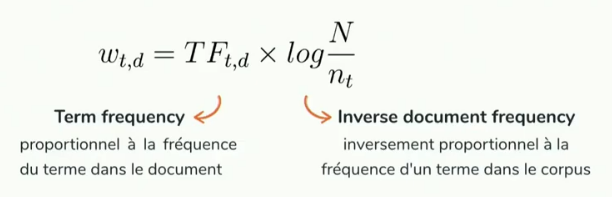

In [11]:
Image(filename = img_path + "NLP-tf-idf.png")

<div style="display: flex; background-color: Green; padding: 7px;" >

### NER et POS par token
</div>

- Recherche d'entités nommées (Names Entity Recognition)
- Etiquetage morpho-syntaxique (Parts-Of-Speech tagging)

Au final ça revient à classifier les token

    Part-of-speech (POS) tagging is the task of finding the grammatical nature of the words in a sentence: nouns, verbs, adjectives, etc.

    Named-entity recognition (NER) is the task of identifying persons, places and organizations in a text.

    Use spaCy to do POS and NER  right out of the box.

    POS is a key component in NLP applications such as sentiment analysis, named-entity recognition, and word sense disambiguation.

    As shown in Alice in Wonderland, NER is not as straightforward as POS and requires extra preprocessing to identify entities.

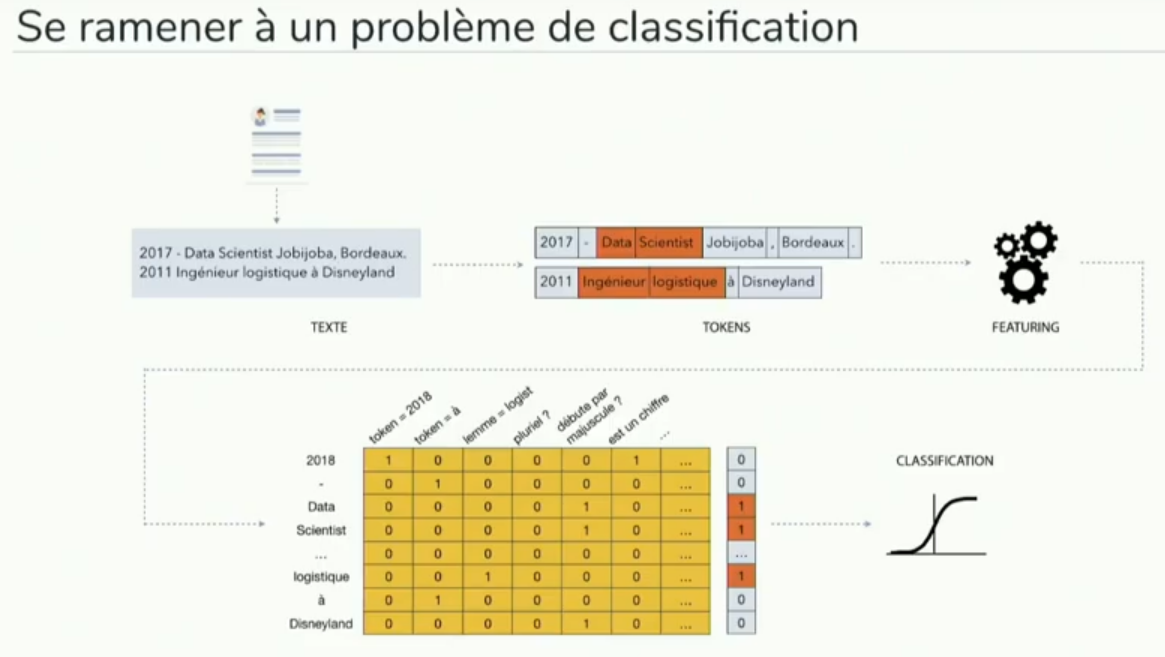

In [13]:
Image(filename = img_path + "NLP-002-NER-classification.png")

<div style="display: flex; background-color: Green; padding: 7px;" >

### Word embeddings
</div>

- Représenter chaque mot par un vecteur de R
- Concept pas nouveau (VSM, LSA)
- décomposition SVD sur une matrice PMI (pointwise mutual information) qui donneraient des performances largement suffisante pour la plupart des applications industrielles
- CBOW, skipgram
- Avancées récentes :
  - Word2vc, T. Mikolov (Google), 2013
  - GloVe, J. Pennington (Stanford), 2014
  - FastText, Facebook AI Research, 2016
  - 
       
       
       
la dimension de l’espace d’embedding, par exemple (qui peut varier grosso modo entre 20 et 300 dimensions)
https://openclassrooms.com/fr/courses/4470541-analysez-vos-donnees-textuelles/4855036-traitez-le-corpus-de-textes-a-laide-de-reseaux-de-neurones

<div style="display: flex; background-color: indigo;" >

### Word2vec
</div>

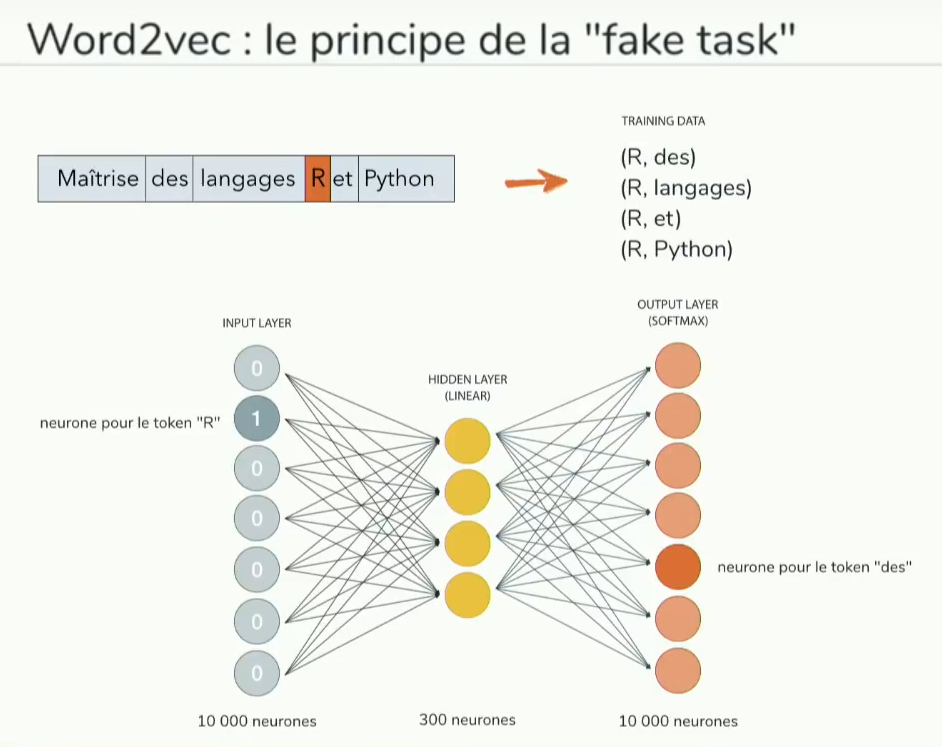

In [15]:
Image(filename = img_path + "NLP003-word2vec.png")

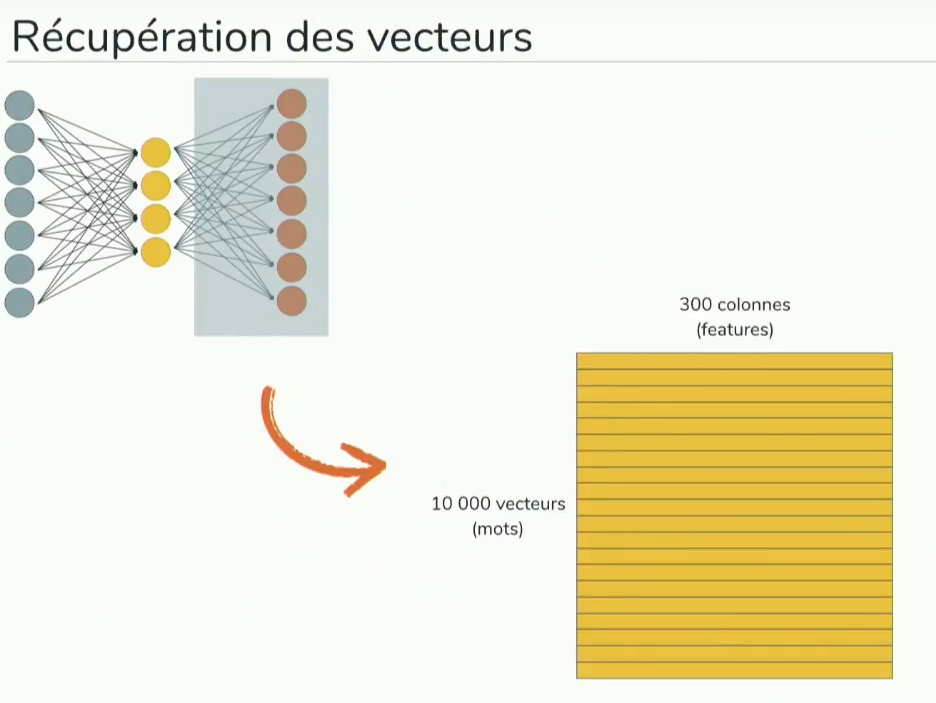

In [16]:
Image(filename = img_path + "NLP004-word2vec.png")

In [17]:
import gensim

In [19]:
list = ["maitrise des langages r et python",
        "connaissance avancee des langages python ou r",
        "recherche un developpeur python",
        "recherche developpeur java qui maitrise python",
        "comptabilite bilan bancaire declaration fiscale",
        "comptabilite analytique bilan et compte de resultat",
        "vos principales missions comptabilite generale compte de resultat bilan fiscalite"
        ]
    
bgow = [pre_process(tok.lower()) for tok in list]
bgow

[['maitrise', 'langages', 'r', 'python'],
 ['connaissance', 'avancee', 'langages', 'python', 'r'],
 ['recherche', 'developpeur', 'python'],
 ['recherche', 'developpeur', 'java', 'maitrise', 'python'],
 ['comptabilite', 'bilan', 'bancaire', 'declaration', 'fiscale'],
 ['comptabilite', 'analytique', 'bilan', 'compte', 'resultat'],
 ['vos',
  'principales',
  'missions',
  'comptabilite',
  'generale',
  'compte',
  'resultat',
  'bilan',
  'fiscalite']]

In [22]:
sentences = bgow
# model = gensim.models.Word2Vec(sentences, window=5, size=300, min_count=1, iter=10)
model = gensim.models.Word2Vec(sentences, window=5, min_count=1)

In [24]:
model.wv.most_similar("java")[:3]

[('bilan', 0.1229494959115982),
 ('maitrise', 0.08058274537324905),
 ('avancee', 0.06544313579797745)]

In [25]:
model.wv.most_similar("comptabilite")[:3]

[('compte', 0.19967550039291382),
 ('declaration', 0.17326107621192932),
 ('r', 0.17023730278015137)]

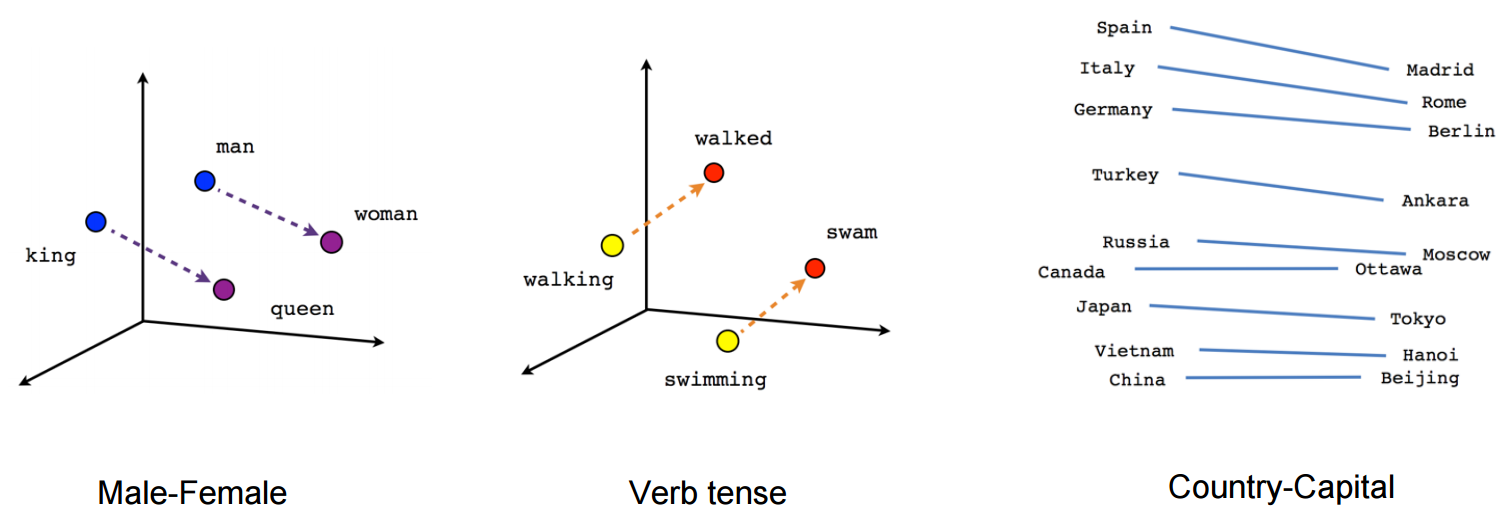

In [26]:
Image("https://www.tensorflow.org/images/linear-relationships.png")

<div style="display: flex; background-color: indigo;" >

## RNN
</div>
https://openclassrooms.com/fr/courses/4470541-analysez-vos-donnees-textuelles/4855036-traitez-le-corpus-de-textes-a-laide-de-reseaux-de-neurones#/id/r-4881222
   

RNN représentent la famille de réseau de neurones qui traite les données de manière séquentielles. L’idée principale étant que chaque nouveau mot qui est prédit à partir de notre modèle, prend en compte l’état précédent afin de s’actualiser. L’état représente fondamentalement l’historique - la mémoire utilisée dans le réseau de neurones pour prendre en compte le passé (TOUT le passé) afin de l’utiliser dans la prédiction à l’instant t

En pratique, on voit que le RNN ne peut prendre en compte que très peu de contexte passé à cause de cette disparition de gradient.

Il existe une grande variété de techniques qui sont utilisés pour mitiger ce problème. Notamment en premier lieu, une architecture plus robuste qui a été imaginée quelques années après l’apparition des RNN appelée LSTM (Long Short Term Memory)


<div style="display: flex; background-color: indigo;" >

## Long Short Term Memory : LSTM
</div>


L’idée principale des LSTM est de permettre au réseau “d’oublier” ou de ne pas prendre en compte certaines observations passées afin de pouvoir donner du poids aux informations importantes dans la prédiction actuelle.

<div style="display: flex; background-color: indigo;" >

## Les réseaux de neurones résiduels
</div>

Ils permettent aussi de mitiger l’effet de diminution trop brutal du gradient. Pour cela simplement, on ajoute directement l’identité de l’état précédent dans la fonction de calcul. Cela a pour effet de diminuer ce problème de disparition du gradient.

<div style="display: flex; background-color: indigo;" >

## Applications
</div

Avec ces architectures, on peut avoir une meilleure représentation d’un corpus de texte puisqu’on prend en compte son caractère séquentiel. Voici quelques domaines d’application dans lesquels ce genre d’architecture a été particulièrement performant :

- Classification de texte
- POS Tagging et NER
- Speech to text
- Traduction automatique
- Génération automatique de texte et notamment de légendes d’images

Ce qu’il faut garder en tête, c’est que les réseaux de neurones récurrent bien entraînés permettent d’intégrer la manière dont est structuré un langage (ou un sous-ensemble du langage) ou toute séquence de texte. Le fait d’avoir ce modèle permet une infinité d’applications liée aux texte, qu’il faut paramétrer et personnaliser pour votre problème spécifique.

> Encore une fois, attention à ne pas  utiliser un canon pour tuer une mouche, et être bien sûr que toutes les circonstances (taille des données d’entraînement etc) sont présentes pour l’utilisation d’un réseau de neurones efficace.

<div style="display: flex; background-color: Blue; padding: 15px;" >

# Topic modeling : Modélisez des sujets avec des méthodes non supervisées
</div>

https://openclassrooms.com/fr/courses/4470541-analysez-vos-donnees-textuelles/4855011-modelisez-des-sujets-avec-des-methodes-non-supervisees   

<div style="display: flex; background-color: Green; padding: 7px;" >

## Critères différenciants entre les solutions
</div>

- modélisation dynamique des sujets dans le temps
- longueur du document
- nombre de sujets abordés
- ...

C’est aussi une famille de méthode utilisé essentiellement en exploration voire semi-supervisée, c’est à dire qui permet de détecter si effectivement il y a de grandes catégories abordées, et ensuite les affiner lors du passage en production, et supervision des nouveaux documents entrants.

<div style="display: flex; background-color: Green; padding: 7px;" >

## Latent Dirichlet Allocation (LDA)
</div>

La première méthode vraiment efficace est nommé LDA (Latent Dirichlet Allocation).       
C’est une méthode non-supervisée générative qui se base sur les hypothèses suivantes :

- Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words) ;
- Chaque document m aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres `p(θm)`
- Chaque mot possède une distribution associée à chaque thème `p(ϕk)`. On peut ainsi représenter chaque thème par une probabilité sur chaque mot.
- `zn` représente le thème du mot `wn`

Puisque l'on a accès uniquement aux documents, on doit déterminer quels sont les thèmes, les distributions de chaque mot sur les thèmes, la fréquence d’apparition de chaque thème sur le corpus.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)

In [ ]:
# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
no_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

<div style="display: flex; background-color: Green; padding: 7px;" >

## NMF (Negative Matrix Factorisation)
</div>


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, 
    min_df=2, 
    max_features=no_features, 
    stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)


NameError: name 'no_features' is not defined

<div style="display: flex; background-color: Blue; padding: 15px;" >

# Quel modèle choisir
</div>
      
<div style="display: flex; background-color: indigo;" >

## classifieur bayésien naïf
</div>

Une hypothèse très forte qui est faite lors de l’utilisation du classifieur Bayes est l’<mark>indépendance des features.</mark>      
Ce qui signifie que si deux features sont en réalité corrélées, elles auront un effet plus fort que ce qu’elles apportent en réalité comme information pour la classification.      
D’autres types de modèles ne sont pas aussi sensibles à cette corrélation entre les features, voire permettent de modéliser cette interaction entre les features pour rendre le modèle plus performant. C'est une des différences possibles qui influenceront votre choix de classifieur. En général, l'idée est de pré-tester un certain nombre de classifieur qui intuitivement correspondent à votre problème pour savoir sur lequel vous concentrer.       

In `scikit-learn`, you can use the `MultinomialNB model`:

```python
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X, y)

# 3. Make predictions 
yhat = clf.predict(X)

# 4. score
print("Accuracy: ",accuracy_score(y, yhat))
```

<div style="display: flex; background-color: indigo;" >

## Régression Logistique
</div>
La régression logistique, à l’opposé de la classification bayes, est un modèle de <mark>classification discriminant.</mark> (https://openclassrooms.com/courses/entrainez-un-modele-predictif-lineaire/predisez-lineairement-la-probabilite-de-lappartenance-dun-point-a-une-classe)      

Son objectif est de maximiser la probabilité d’avoir une classe `y = c` étant donné certaines features `f(x,c)` calculées à partir des observations x. Cette maximisation s’effectue en général avec les méthodes classiques de descente de gradient, avec un terme de régularisation supplémentaire.

On peut directement appliquer la régression logistique sur des matrices creuses de la taille du vocabulaire ou sur les vecteurs plus denses que l’on a créé à l’aide des techniques utilisées dans les chapitres précédents.

<div style="display: flex; background-color: indigo;" >

## SVM, forêts aléatoires
</div>      
Le choix d’un classifieur est en fait un retour à l’éternel dilemme biais-variance, indépendamment du fait qu’on est amené à traiter du texte. Le classifieur Naive Bayes possède une variance faible et va pouvoir mieux généraliser plus rapidement, ce qui peut être utile lorsqu’on a un petit jeu de données ou des documents avec peu de texte. La contrepartie, bien sûr, c’est que ce genre de classifieur va avoir une plus faible précision (un biais plus grand) comparé à des classifieurs type SVM + RBF Kernel ou une régression logistique.  

<div style="display: flex; background-color: indigo;" >

## Comment choisir le modèle de détection des sentiments
</div>      

https://aclanthology.org/P12-2018/

<div style="display: flex; background-color: Blue; padding: 15px;" >

# Traitez le corpus de textes à l'aide de réseaux de neurones

<div style="display: flex; background-color: Blue; padding: 15px;" >

# ANNEXES

<div style="display: flex; background-color: Green; padding: 7px;" >

## Sources
</div>

- https://www.youtube.com/watch?v=SCs8N_-t3cE
- https://www.tensorflow.org/images/linear-relationships.png
- https://openclassrooms.com/fr/courses/4470541-analysez-vos-donnees-textuelles/4855001-representez-votre-corpus-en-bag-of-words
- https://openclassrooms.com/fr/courses/6532301-introduction-to-natural-language-processing/6980971-compare-embedding-models

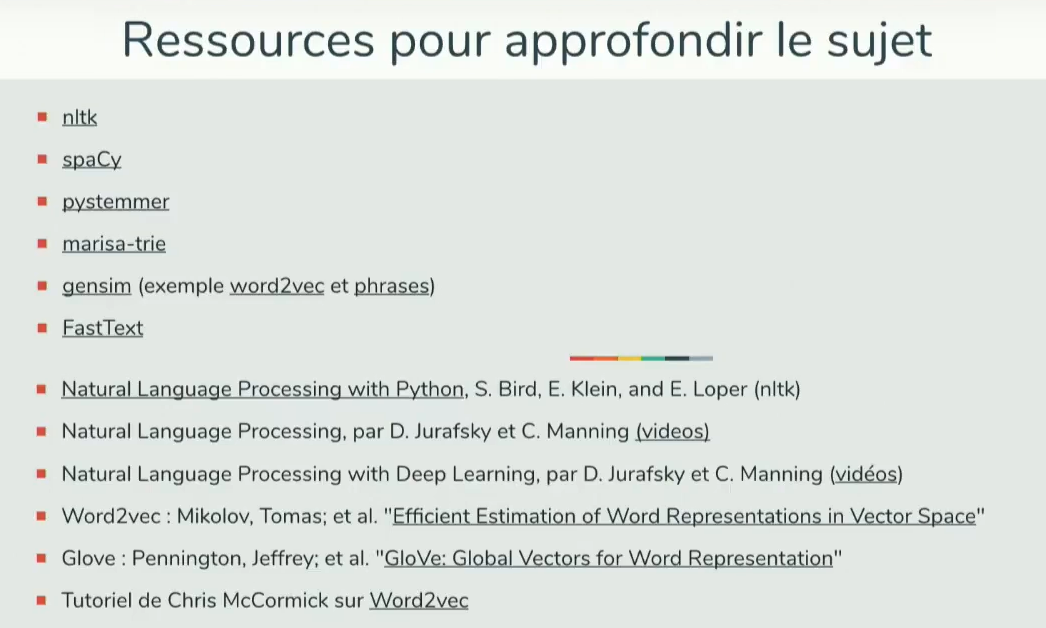

In [28]:
Image(filename = img_path + "NLP005-ressources.png")